Cremildo Riba Gouveia Dias

Using the dataset in EFIplus_medit.zip:
1. Create a column with the total number of species present (species richness) in each sampling site.
2. Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope , Elevation_mean_catch , prec_ann_catch , temp_ann , temp_jan , temp_jul . Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r square and the F statistics.
3. Now try to run a multiple linear regression with the same data and check the differences between theprevious univariate regression coefficients and the new coefficients.
4. Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.

In [84]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

# Importar ficheiro
df3 = pd.read_csv("D:\\avdac\greends-avcd\people\cremildo\EFIplus_medit.zip",compression="zip", sep=";")
df3 = df3.dropna() # drops rows when  all elements are missing values
#print(df0)

In [ ]:
list(df3)

In [85]:
# Now check the index of the first species column
df3.columns.get_loc("Abramis brama")

56

In [86]:
# são 56 colunas extraidas de especies
Esp_Extr = df3.columns[56:]
Esp_Extr

Index(['Abramis brama', 'Achondrostoma arcasii', 'Achondrostoma occidentale',
       'Achondrostoma oligolepis', 'Acipenser naccarii',
       'Alburnoides bipunctatus', 'Alburnus albidus', 'Alburnus alburnus',
       'Alosa alosa', 'Alosa fallax',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=108)

In [87]:
# Somar todas as presença/ausencia de especies em nova coluna chamada riquez_esp
df3['riquez_esp'] = df3[Esp_Extr].sum(axis=1)

2. Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope , Elevation_mean_catch , prec_ann_catch , temp_ann , temp_jan , temp_jul . Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r square and the F statistics.

In [88]:
# Subset the df3 by selecting the environmental variables and the species richness columns
df3_riquez_esp = df3[["riquez_esp", "Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df3_riquez_esp

,riquez_esp,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,6,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,6,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,7,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,8,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,7,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...,...
5006,5,80,17.700,535.776632,1274.106711,14.9,8.6,20.5
5007,7,150,0.010,552.966008,1226.616143,15.0,7.7,20.9
5008,6,140,3.059,552.966008,1226.616143,15.0,7.9,20.9
5009,1,450,62.100,850.789660,1480.433598,12.9,6.8,19.5


<Axes: ylabel='Count'>

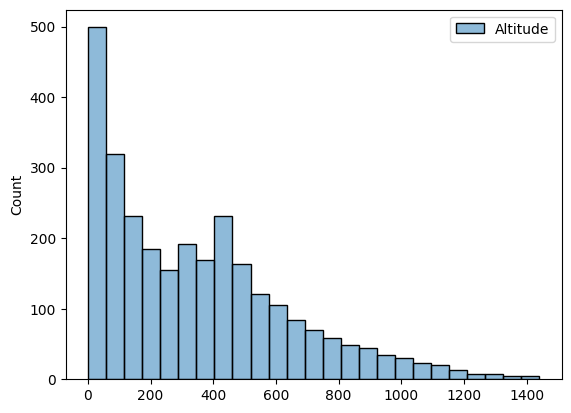

In [89]:
# importando as libs
import seaborn as sns # for plotting
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from   sklearn.metrics import r2_score
import numpy as np

# Plot histogram for each environmental variable (replace by variable name)
sns.histplot(data=df3_riquez_esp[["Altitude"]])

In [90]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["Altitude"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.912, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\1212170222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['Altitude']] = np.sqrt(df3_riquez_esp[['Altitude']]+1)


<Axes: ylabel='Count'>

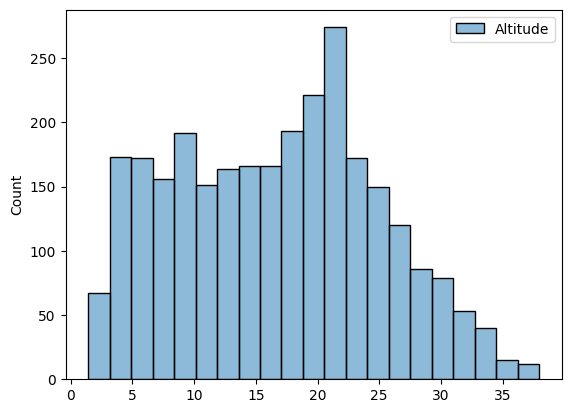

In [91]:
# Better to Square-root transformation"Altitude" (e.g. Square-root)
df3_riquez_esp[['Altitude']] = np.sqrt(df3_riquez_esp[['Altitude']]+1)
sns.histplot(data=df3_riquez_esp[["Altitude"]])

<Axes: ylabel='Count'>

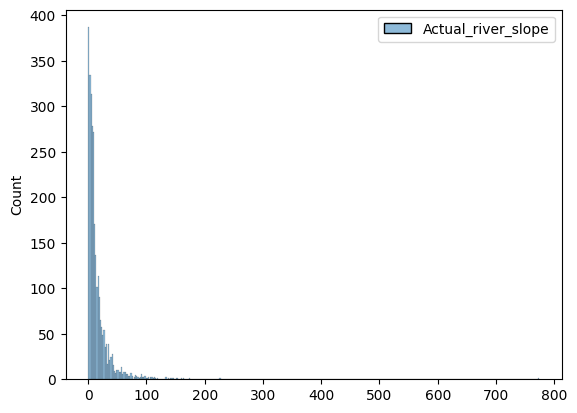

In [92]:
sns.histplot(data=df3_riquez_esp[["Actual_river_slope"]])


In [93]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["Actual_river_slope"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\2511137873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['Actual_river_slope']] = np.log10(df3_riquez_esp[['Actual_river_slope']]+1)


<Axes: ylabel='Count'>

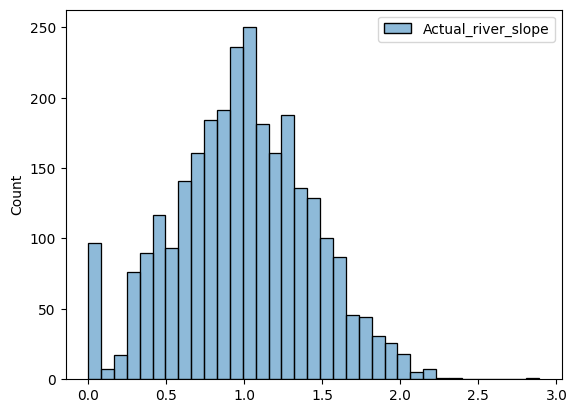

In [94]:
# Better to Logarithmic transformation "Actual_river_slope" 
df3_riquez_esp[['Actual_river_slope']] = np.log10(df3_riquez_esp[['Actual_river_slope']]+1)
sns.histplot(data=df3_riquez_esp[["Actual_river_slope"]])

<Axes: ylabel='Count'>

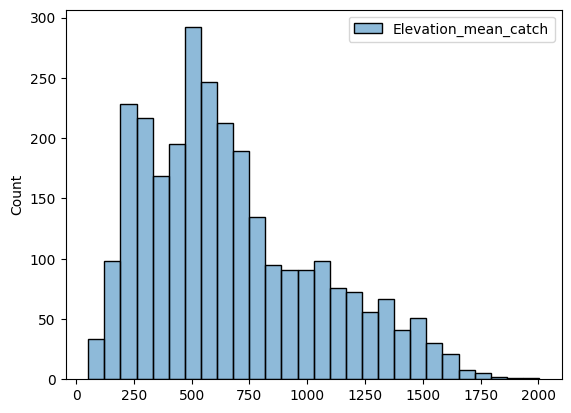

In [95]:
sns.histplot(data=df3_riquez_esp[["Elevation_mean_catch"]])


In [96]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["Elevation_mean_catch"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.943, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\3873074185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['Elevation_mean_catch']] = np.log10(df3_riquez_esp[['Elevation_mean_catch']]+1)


<Axes: ylabel='Count'>

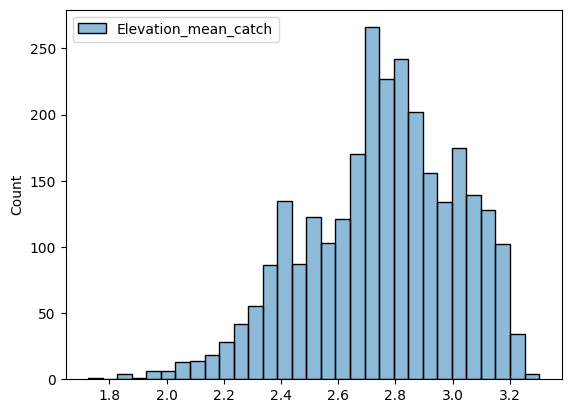

In [97]:
# Better to Logarithmic transformation "Elevation_mean_catch" 
df3_riquez_esp[['Elevation_mean_catch']] = np.log10(df3_riquez_esp[['Elevation_mean_catch']]+1)
sns.histplot(data=df3_riquez_esp[["Elevation_mean_catch"]])



<Axes: ylabel='Count'>

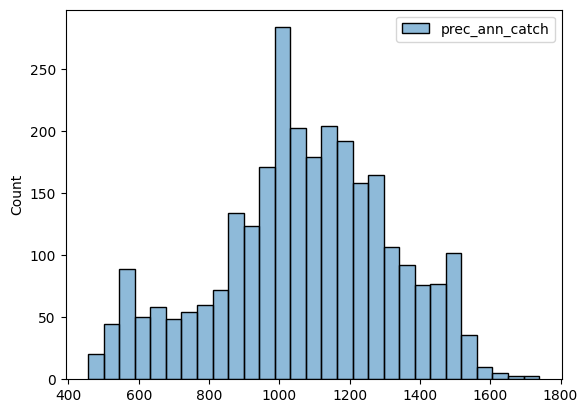

In [98]:
sns.histplot(data=df3_riquez_esp[["prec_ann_catch"]])


In [99]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["prec_ann_catch"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.984, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\2833116683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['prec_ann_catch']] = np.sqrt(df3_riquez_esp[['prec_ann_catch']]+1)


<Axes: ylabel='Count'>

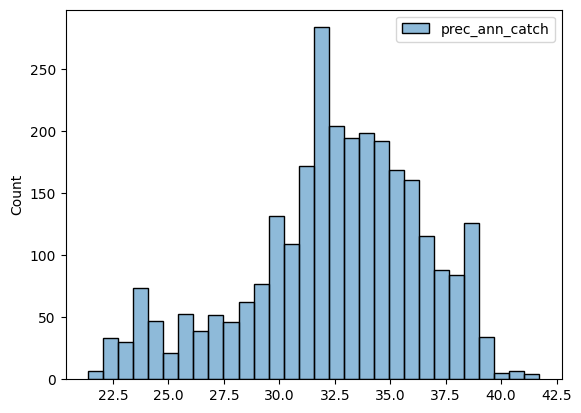

In [100]:
# Better to Square-root transformation "prec_ann_catch" 
df3_riquez_esp[['prec_ann_catch']] = np.sqrt(df3_riquez_esp[['prec_ann_catch']]+1)
sns.histplot(data=df3_riquez_esp[["prec_ann_catch"]])

<Axes: ylabel='Count'>

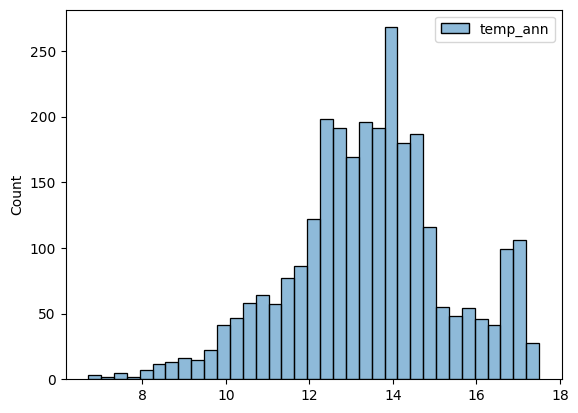

In [101]:
sns.histplot(data=df3_riquez_esp[["temp_ann"]])


In [102]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["temp_ann"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.986, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\405979291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['temp_ann']] = np.sqrt(df3_riquez_esp[['temp_ann']]+1)


<Axes: ylabel='Count'>

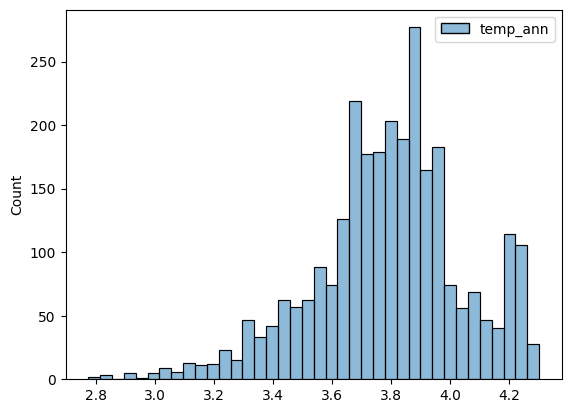

In [103]:
# Better to Square-root transformation "temp_ann" 
df3_riquez_esp[['temp_ann']] = np.sqrt(df3_riquez_esp[['temp_ann']]+1)
sns.histplot(data=df3_riquez_esp[["temp_ann"]])

<Axes: ylabel='Count'>

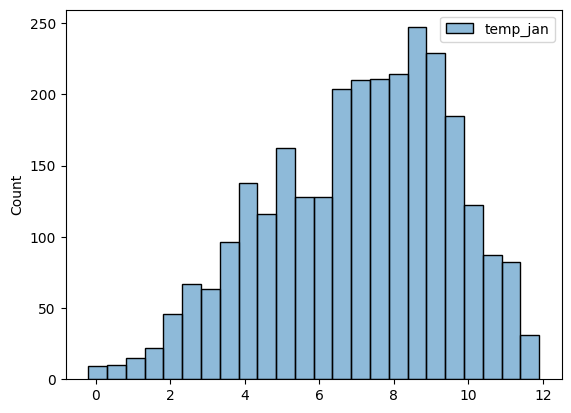

In [104]:
sns.histplot(data=df3_riquez_esp[["temp_jan"]])


In [105]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["temp_jan"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.978, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\2795838239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['temp_jan']] = np.cbrt(df3_riquez_esp[['temp_jan']]+1)


<Axes: ylabel='Count'>

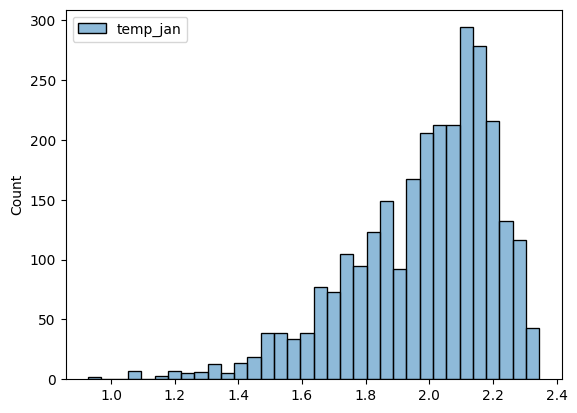

In [106]:
# Better to Cube-root transformation "temp_jan" 
df3_riquez_esp[['temp_jan']] = np.cbrt(df3_riquez_esp[['temp_jan']]+1)
sns.histplot(data=df3_riquez_esp[["temp_jan"]])

<Axes: ylabel='Count'>

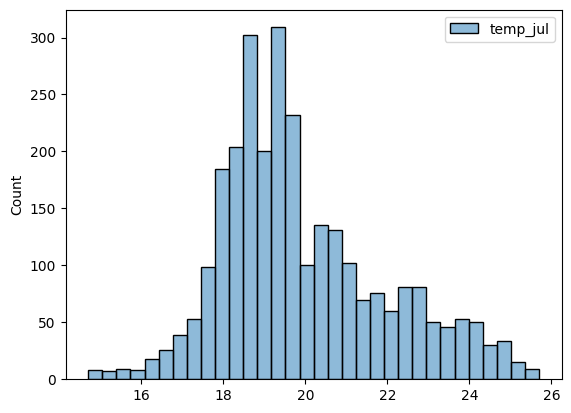

In [107]:
sns.histplot(data=df3_riquez_esp[["temp_jul"]])

In [108]:
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df3_riquez_esp["temp_jul"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.956, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


C:\Users\isa12\AppData\Local\Temp\ipykernel_18936\4141998319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_riquez_esp[['temp_jul']] = np.cbrt(df3_riquez_esp[['temp_jul']]+1)


<Axes: ylabel='Count'>

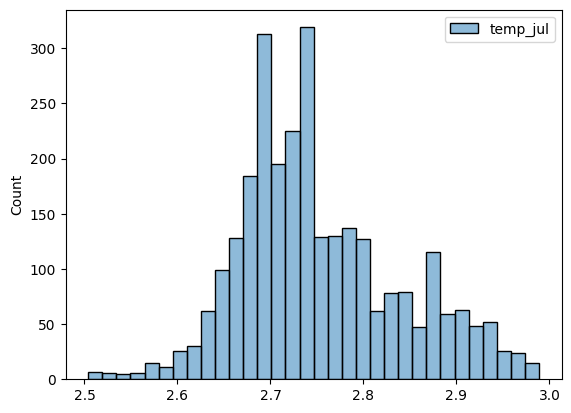

In [109]:
# Better to Cube-root transformation "temp_jul" 
df3_riquez_esp[['temp_jul']] = np.cbrt(df3_riquez_esp[['temp_jul']]+1)
sns.histplot(data=df3_riquez_esp[["temp_jul"]])

In [110]:
# Run regression for each environmental variable. import formula api as alias smf 
import statsmodels.formula.api as smf

# formula: response ~ predictor
model_alt = smf.ols(formula='riquez_esp ~ Altitude', data=df3_riquez_esp).fit().summary()
model_AcRislope = smf.ols(formula='riquez_esp ~ Actual_river_slope', data=df3_riquez_esp).fit().summary()
model_elevMeCa = smf.ols(formula='riquez_esp ~ Elevation_mean_catch', data=df3_riquez_esp).fit().summary()
model_precAnCa = smf.ols(formula='riquez_esp ~ prec_ann_catch', data=df3_riquez_esp).fit().summary()
model_tempAn = smf.ols(formula='riquez_esp ~ temp_ann', data=df3_riquez_esp).fit().summary()
model_tempJan = smf.ols(formula='riquez_esp ~ temp_jan', data=df3_riquez_esp).fit().summary()
model_tempJul = smf.ols(formula='riquez_esp ~ temp_jul', data=df3_riquez_esp).fit().summary()

print(model_alt)
print(model_AcRislope)
print(model_elevMeCa)
print(model_precAnCa)
print(model_tempAn)
print(model_tempJan)
print(model_tempJul)

                            OLS Regression Results                            
Dep. Variable:             riquez_esp   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     613.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.01e-122
Time:                        17:47:43   Log-Likelihood:                -6235.1
No. Observations:                2822   AIC:                         1.247e+04
Df Residuals:                    2820   BIC:                         1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5010      0.094     58.660      0.0

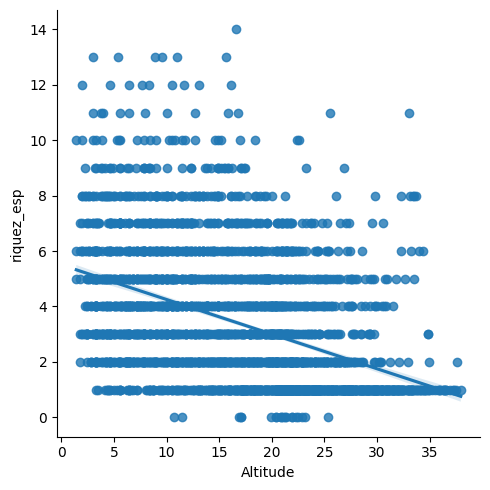

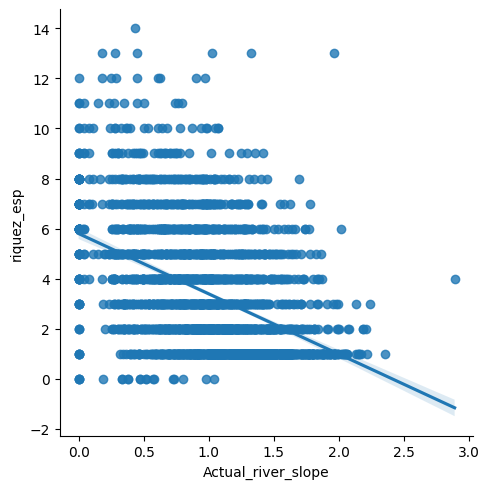

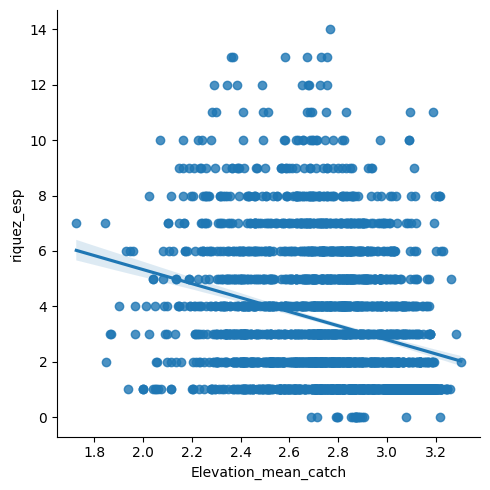

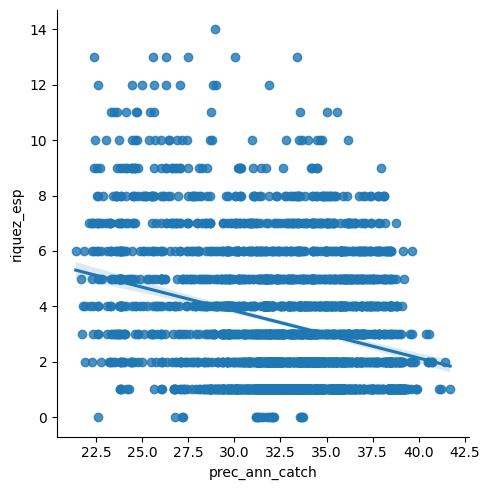

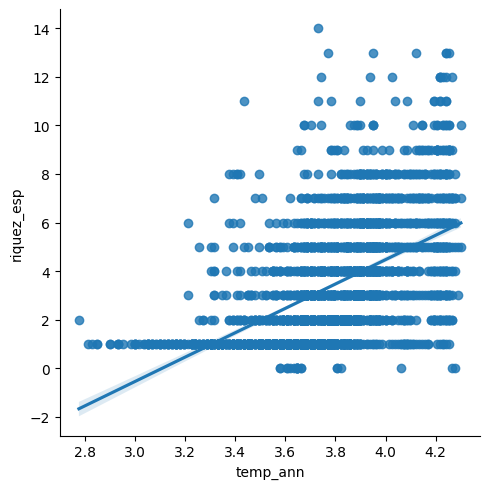

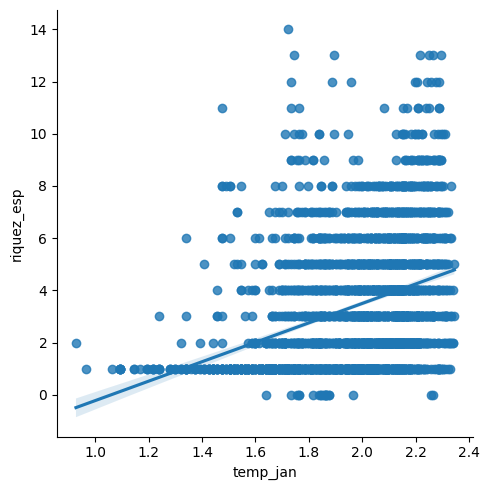

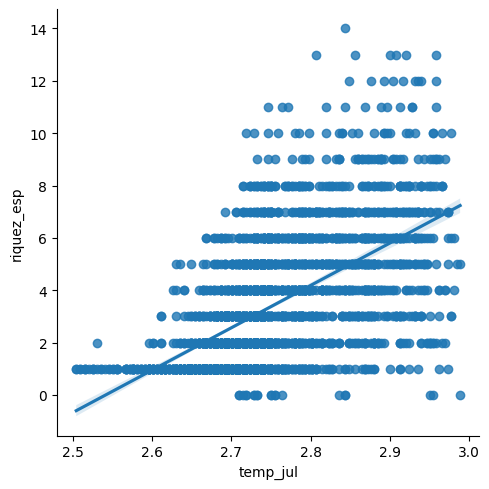

In [111]:
sns.lmplot(x='Altitude', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='Actual_river_slope', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='Elevation_mean_catch', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='prec_ann_catch', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='temp_ann', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='temp_jan', y='riquez_esp', data=df3_riquez_esp)
sns.lmplot(x='temp_jul', y='riquez_esp', data=df3_riquez_esp)

In [113]:
# Alternative using a loop

import statsmodels.api as sm

var_resposta = 'riquez_esp'
var_explicativa = ["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]

# Loop through each exogenous variable and run a linear regression
for var_explicativa in var_explicativa:
    # Extract the response and explanatory variables
    y = df3_riquez_esp[var_resposta]
    X = df3_riquez_esp[var_explicativa]
    
    # Add a constant term to the explanatory variable (intercept term)
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Print the results
    print(f"Linear Regression Results for '{var_resposta}' vs '{var_explicativa}':")
    print(results.summary())

Linear Regression Results for 'riquez_esp' vs 'Altitude':
                            OLS Regression Results                            
Dep. Variable:             riquez_esp   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     613.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.01e-122
Time:                        18:00:21   Log-Likelihood:                -6235.1
No. Observations:                2822   AIC:                         1.247e+04
Df Residuals:                    2820   BIC:                         1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

3. Now try to run a multiple linear regression with the same data and check the differences between theprevious univariate regression coefficients and the new coefficients.


In [115]:
# Multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and new coefficients

y=df3_riquez_esp["riquez_esp"]
x=df3_riquez_esp[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(df3_riquez_esp) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             riquez_esp   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     314.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:04:57   Log-Likelihood:                -5696.6
No. Observations:                2822   AIC:                         1.141e+04
Df Residuals:                    2814   BIC:                         1.146e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -25.7860 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


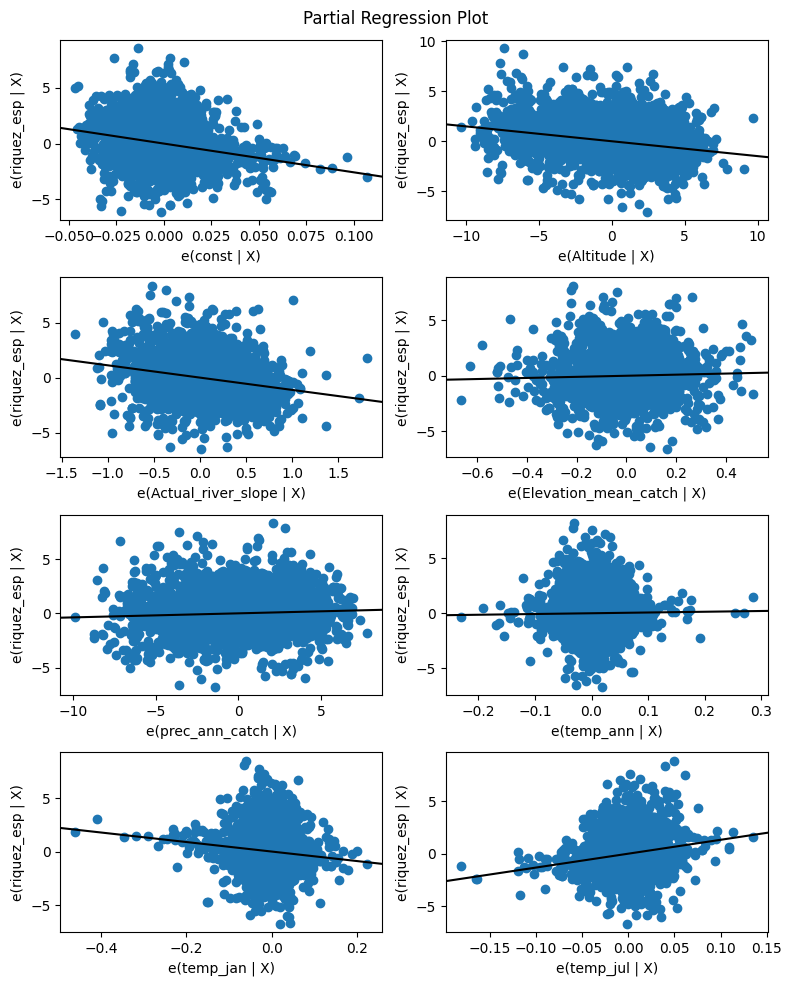

In [116]:
# Get partial dependency plots (compare with the univariate plots above)
fig = plt.figure(figsize=(8, 10))
sm.graphics.plot_partregress_grid(model, fig=fig)
fig.tight_layout(pad=1.0)
plt.show()

4. Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.

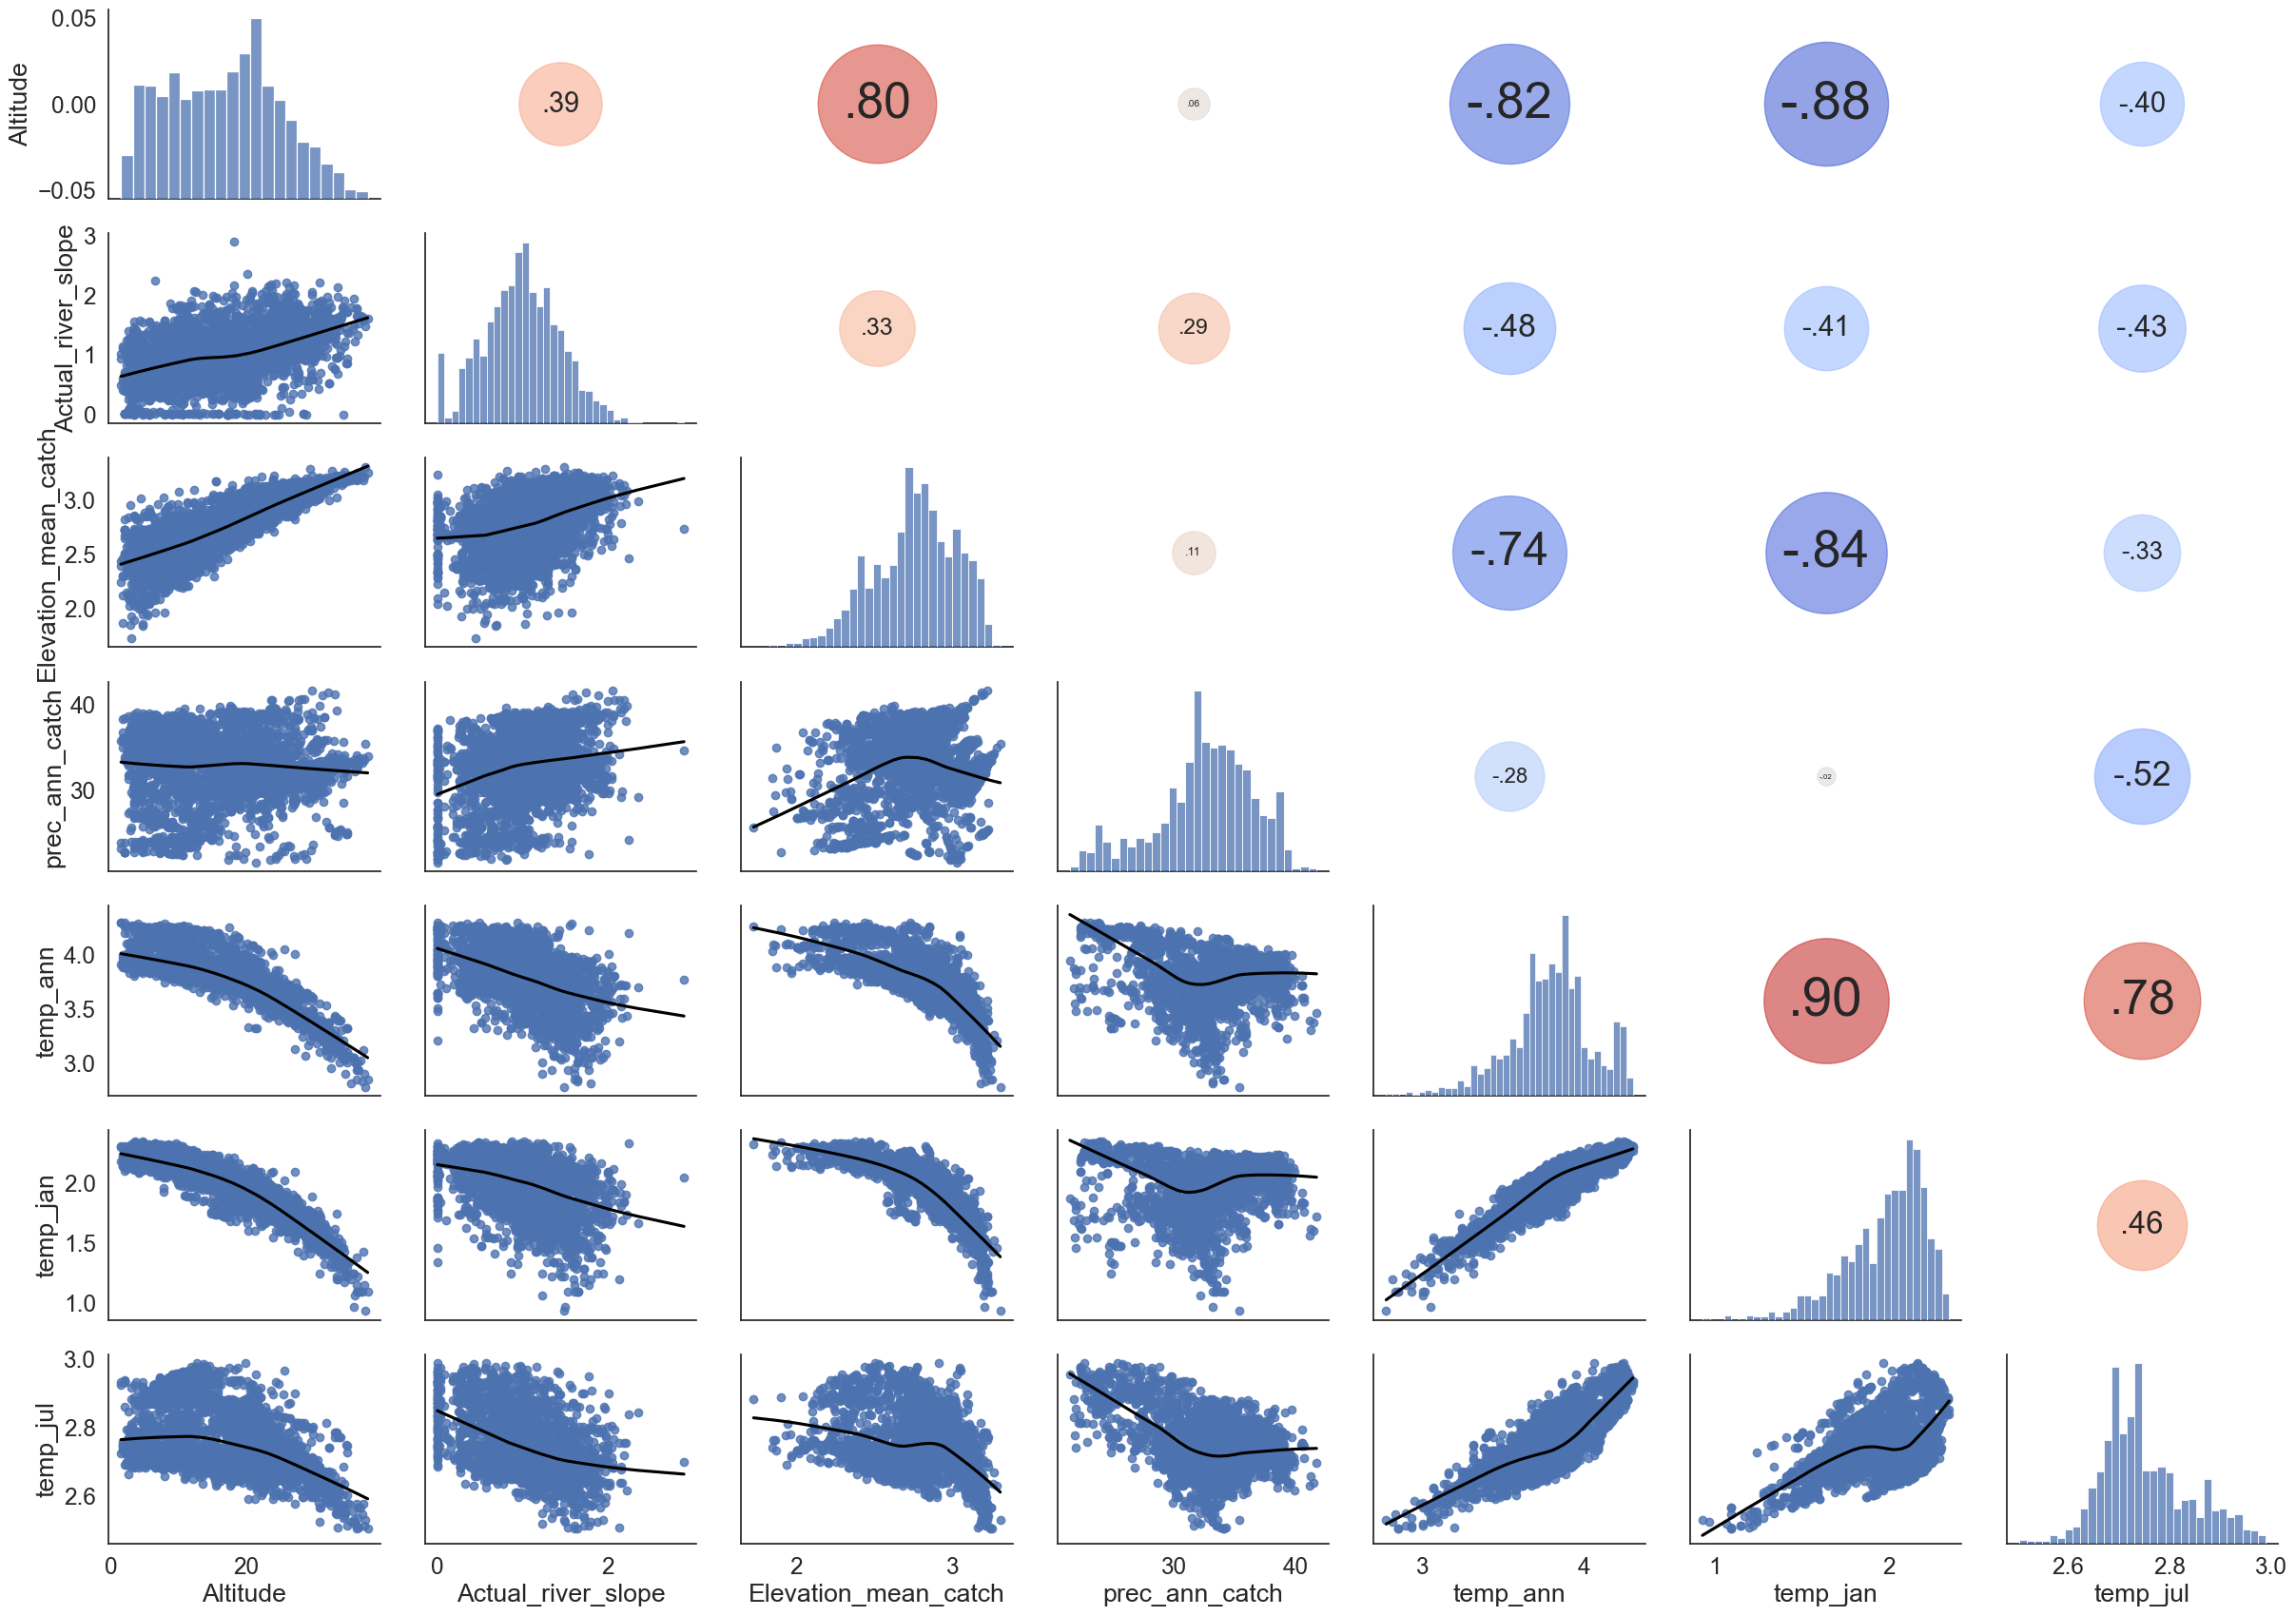

In [117]:
# Visualization of the correlation matrix

# Create plotting function
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# Subset by selecting environmental variables only
df1_des = df3_riquez_esp[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]

# Plot the matrix
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df1_des, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);